### Quection - 01

256


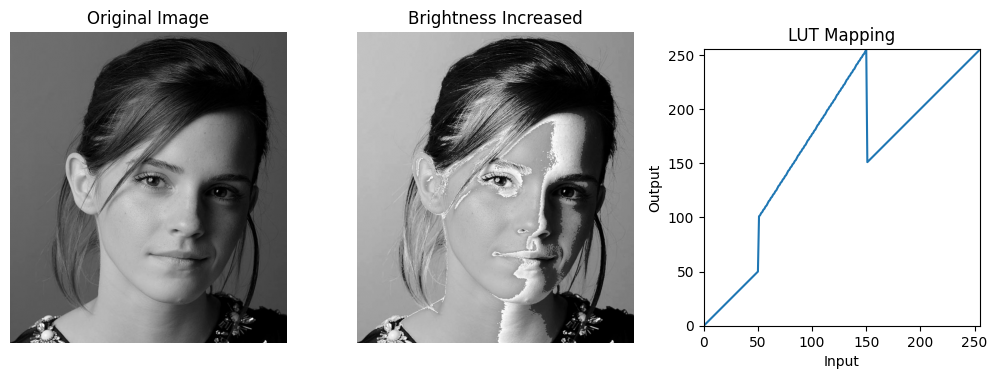

In [70]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

c = np.array([(50,50),(50,100),(150,255),(150,150)])

t1 = np.linspace(0,50,51).astype('uint8')
t2 = np.linspace(51,100,0).astype('uint8')
t3 = np.linspace(101,255,100).astype('uint8')
t4 = np.linspace(255,150,0).astype('uint8')
t5 = np.linspace(151,255,255-150)

transform = np.concatenate((t1,t2),axis=0).astype('uint8')
transform = np.concatenate((transform,t3),axis=0).astype('uint8')
transform = np.concatenate((transform,t4),axis=0).astype('uint8')
transform = np.concatenate((transform,t5),axis=0).astype('uint8')
print(len(transform))

img_orig = cv.imread('a1images/a1images/emma.jpg', cv.IMREAD_GRAYSCALE)
#print(img_orig)

image_transformed = cv.LUT(img_orig, transform)

fig, ax = plt.subplots(1, 3, figsize=(10, 4))

# Original image
ax[0].imshow(img_orig, cmap='gray', vmin=0, vmax=255)
ax[0].set_title('Original Image')
ax[0].axis('off')

# Transformed image
ax[1].imshow(image_transformed, cmap='gray', vmin=0, vmax=255)
ax[1].set_title('Brightness Increased')
ax[1].axis('off')

# Transformation curve
ax[2].plot(transform)
ax[2].set_title('LUT Mapping')
ax[2].set_xlabel('Input')
ax[2].set_ylabel('Output')
ax[2].set_xlim(0, 255)
ax[2].set_ylim(0, 255)
ax[2].set_aspect('equal')

plt.tight_layout()
plt.show()




### Quection - 02

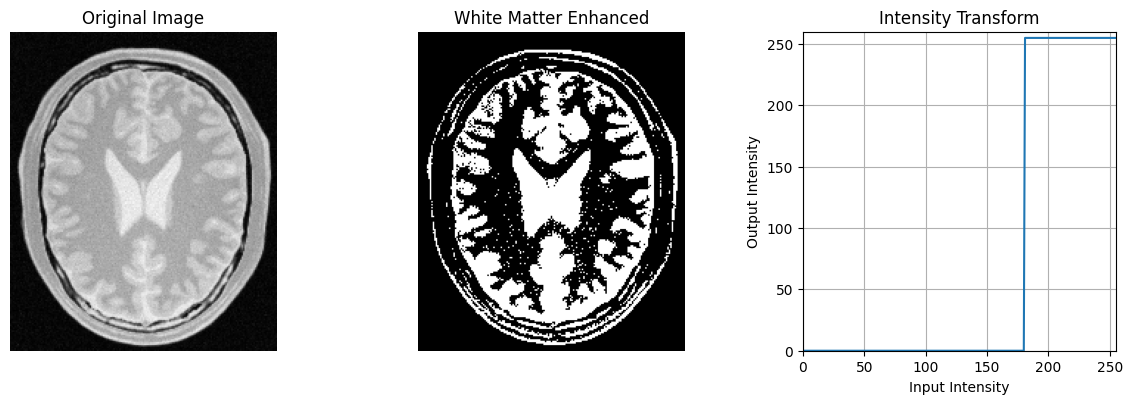

In [73]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

# -------------------------
# Define thresholds for white matter intensity enhancement
# -------------------------
lower_threshold = 180  
upper_threshold = 255  

# Define intensity mapping points
c = np.array([(0, lower_threshold), (lower_threshold, upper_threshold)])

# Generate transformation
t1 = np.linspace(0, c[0, 0], c[0, 1] + 1 - 0).astype('uint8')
t2 = np.linspace(c[1, 1], 255, 255 - c[1, 0]).astype('uint8')

# Concatenate transformation array
transform = np.concatenate((t1, t2), axis=0).astype('uint8')
assert len(transform) == 256

# -------------------------
# Load image
# -------------------------
img_orig = cv.imread('a1images/a1images/Brain_proton_density_slice.png', cv.IMREAD_GRAYSCALE)
assert img_orig is not None

# Apply LUT
image_transformed = cv.LUT(img_orig, transform)

# -------------------------
# Combine plots into 1 figure
# -------------------------
fig, ax = plt.subplots(1, 3, figsize=(12, 4))

# Original image
ax[0].imshow(img_orig, cmap='gray', vmin=0, vmax=255)
ax[0].set_title('Original Image')
ax[0].axis('off')

# Transformed image
ax[1].imshow(image_transformed, cmap='gray', vmin=0, vmax=255)
ax[1].set_title('White Matter Enhanced')
ax[1].axis('off')

# Transformation curve
ax[2].plot(transform)
ax[2].grid(True)
ax[2].set_title('Intensity Transform')
ax[2].set_xlabel('Input Intensity')
ax[2].set_ylabel('Output Intensity')
ax[2].set_xlim(0, 255)
ax[2].set_ylim(0, 260)
ax[2].set_aspect('equal')

plt.tight_layout()
plt.show()

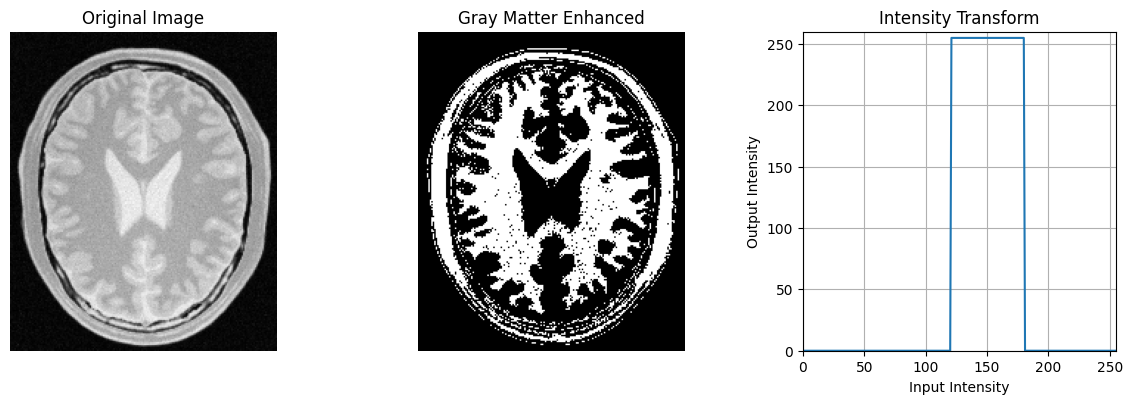

In [76]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

# -------------------------
# Define thresholds for gray matter intensity enhancement
# -------------------------
lower_thresh = 120  
upper_thresh = 180  

# Define intensity mapping points 
c = np.array([(0, lower_thresh), (lower_thresh, 255), (upper_thresh, 255)])

# Generate the transformation
t1 = np.linspace(0, c[0,0], c[0,1] + 1 - 0).astype('uint8')
t2 = np.linspace(c[1,1], c[2,1], c[2,0] - c[1,0]).astype('uint8')
t3 = np.linspace(0, 0, 255 - c[2,0]).astype('uint8')

# Concatenate transformation parts
transform = np.concatenate((t1, t2), axis=0).astype('uint8')
transform = np.concatenate((transform, t3), axis=0).astype('uint8')

# Ensure correct length
assert len(transform) == 256

# -------------------------
# Load image
# -------------------------
img_orig = cv.imread('a1images/a1images/Brain_proton_density_slice.png', cv.IMREAD_GRAYSCALE)
assert img_orig is not None

# Apply LUT
image_transformed = cv.LUT(img_orig, transform)

# -------------------------
# Combine into one figure
# -------------------------
fig, ax = plt.subplots(1, 3, figsize=(12, 4))

# Original image
ax[0].imshow(img_orig, cmap='gray', vmin=0, vmax=255)
ax[0].set_title('Original Image')
ax[0].axis('off')

# Transformed image
ax[1].imshow(image_transformed, cmap='gray', vmin=0, vmax=255)
ax[1].set_title('Gray Matter Enhanced')
ax[1].axis('off')

# Transformation curve
ax[2].plot(transform)
ax[2].grid(True)
ax[2].set_title('Intensity Transform')
ax[2].set_xlabel('Input Intensity')
ax[2].set_ylabel('Output Intensity')
ax[2].set_xlim(0, 255)
ax[2].set_ylim(0, 260)
ax[2].set_aspect('equal')

plt.tight_layout()
plt.show()


### Quection 3

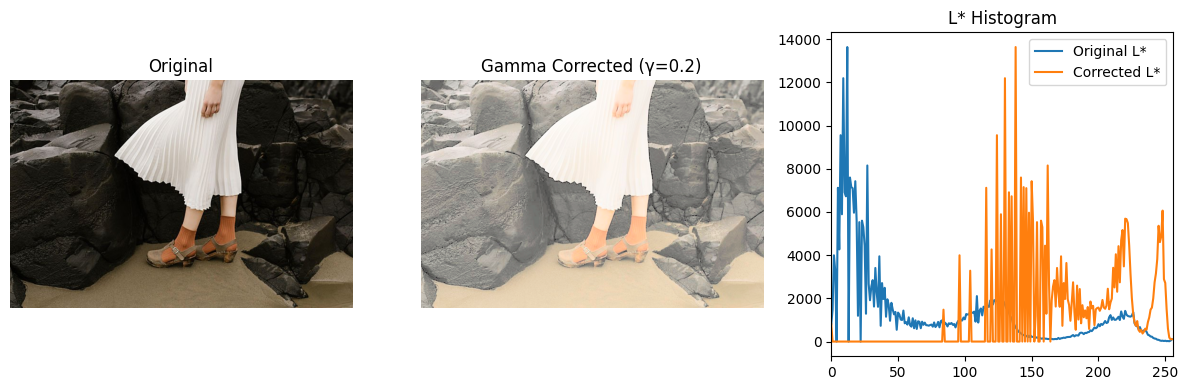

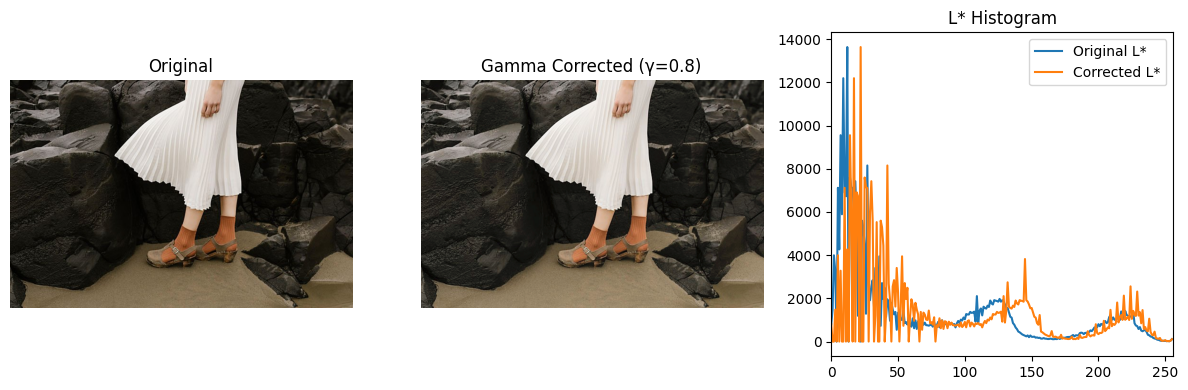

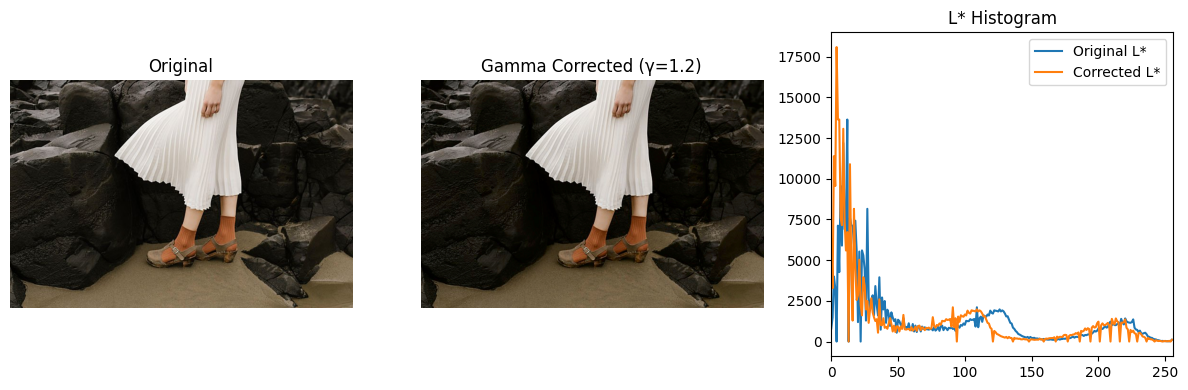

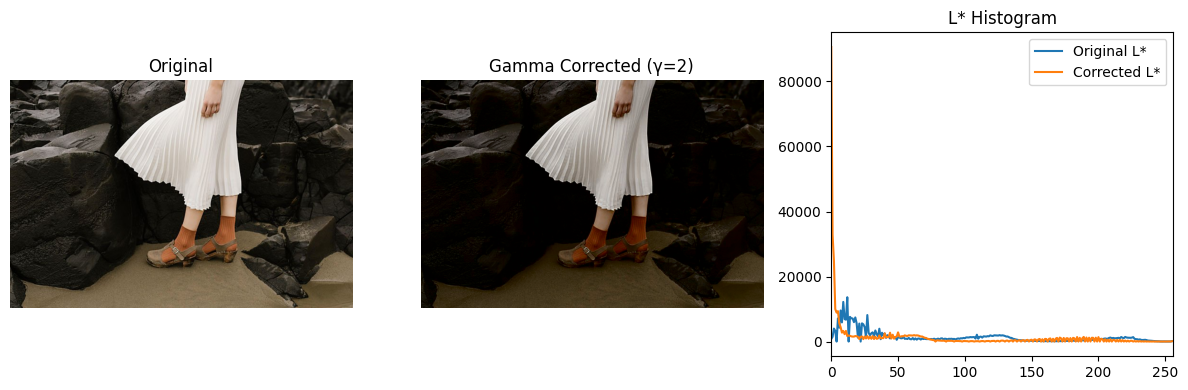

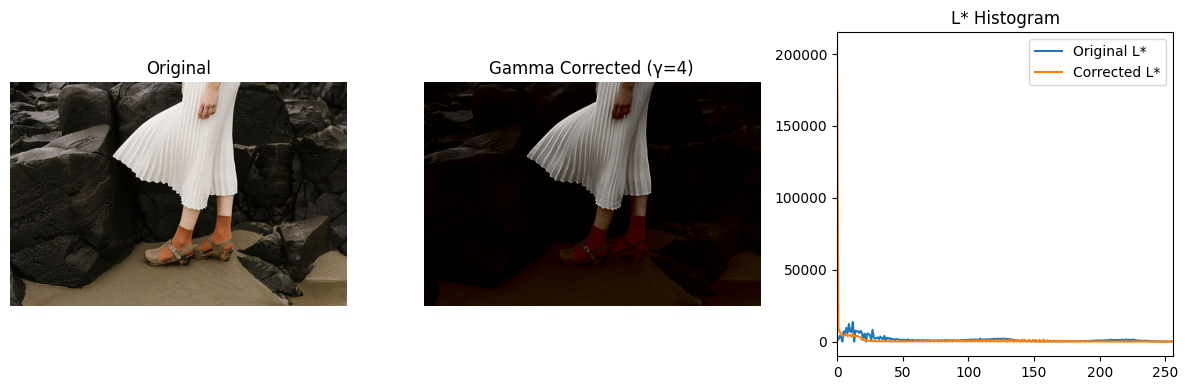

In [79]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

img = cv.imread("a1images/a1images/highlights_and_shadows.jpg")

# Convert the image from BGR to LAB color space and split into channels
L, a, b = cv.split(cv.cvtColor(img, cv.COLOR_BGR2LAB))

# Define gamma values for correction
gamma_values = [0.2, 0.8, 1.2, 2, 4]

for g_val in gamma_values:
    # Create lookup table for gamma correction
    t = np.array([(p / 255) ** g_val * 255 for p in range(256)]).astype(np.uint8)

    # Apply gamma correction to the L channel
    L_corrected = cv.LUT(L, t)

    # Merge corrected L with original a and b
    corrected_img_lab = cv.merge([L_corrected, a, b])
    corrected_img_rgb = cv.cvtColor(corrected_img_lab, cv.COLOR_LAB2RGB)

    # Calculate histograms on L channel (lightness)
    hist_orig = cv.calcHist([L], [0], None, [256], [0, 256])
    hist_corr = cv.calcHist([L_corrected], [0], None, [256], [0, 256])

    # Create one figure with 3 columns: Original, Corrected, Histogram
    fig, ax = plt.subplots(1, 3, figsize=(12, 4))

    # Original image
    ax[0].imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))
    ax[0].set_title('Original')
    ax[0].axis('off')

    # Gamma corrected image
    ax[1].imshow(corrected_img_rgb)
    ax[1].set_title(f'Gamma Corrected (γ={g_val})')
    ax[1].axis('off')

    # Histogram
    ax[2].plot(hist_orig, label='Original L*')
    ax[2].plot(hist_corr, label='Corrected L*')
    ax[2].set_xlim(0, 256)
    ax[2].set_title('L* Histogram')
    ax[2].legend()

    plt.tight_layout()
    plt.show()


### Quection 4 

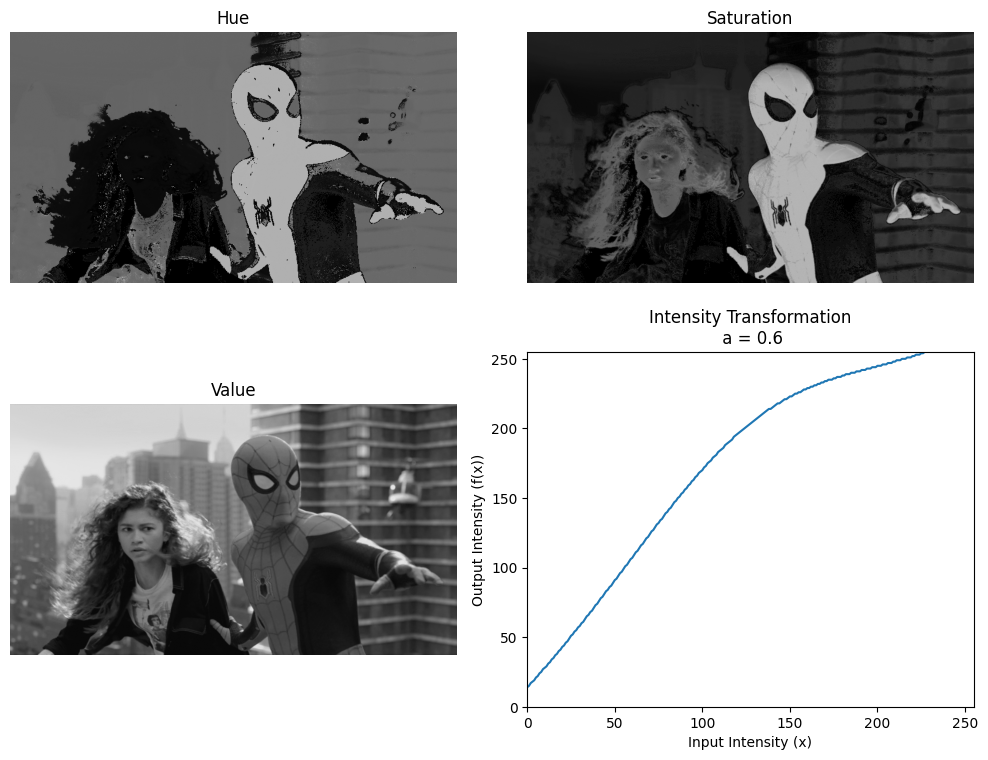

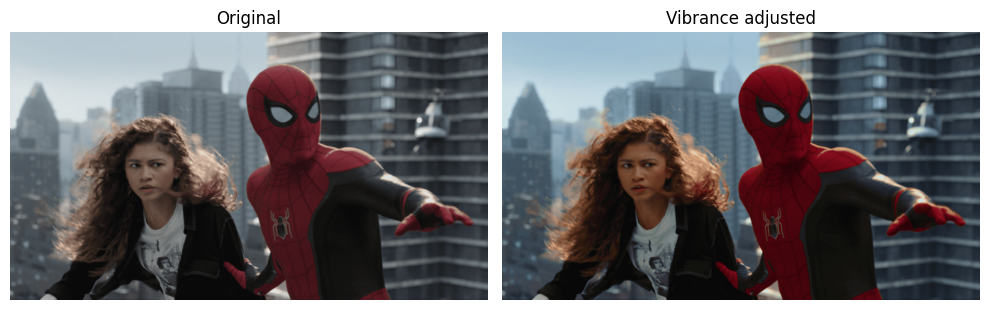

In [92]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

# Read and convert image
spider = cv.imread('a1images/a1images/spider.png')
spider_hsv = cv.cvtColor(spider, cv.COLOR_BGR2HSV)
spider_rgb = cv.cvtColor(spider, cv.COLOR_BGR2RGB)

# Split into planes
H, S, V = cv.split(spider_hsv)

# Parameters for intensity transformation
a = 0.6
sigma = 70.0
x = np.arange(0, 256)
f = np.minimum(x + a * 128 * np.exp(-((x - 128)**2) / (2 * sigma**2)), 255).astype('uint8')

# Create single figure with 4 subplots
fig, ax = plt.subplots(2, 2, figsize=(10, 8))

# Hue
ax[0, 0].imshow(H, cmap='gray', vmin=0, vmax=255)
ax[0, 0].set_title('Hue')
ax[0, 0].axis("off")

# Saturation
ax[0, 1].imshow(S, cmap='gray', vmin=0, vmax=255)
ax[0, 1].set_title('Saturation')
ax[0, 1].axis("off")

# Value
ax[1, 0].imshow(V, cmap='gray', vmin=0, vmax=255)
ax[1, 0].set_title('Value')
ax[1, 0].axis("off")

# Intensity Transformation curve
ax[1, 1].plot(x, f)
ax[1, 1].set_title(f'Intensity Transformation\n a = {a}')
ax[1, 1].set_xlabel('Input Intensity (x)')
ax[1, 1].set_ylabel('Output Intensity (f(x))')
ax[1, 1].grid(False)
ax[1, 1].set_xlim([0, 255])
ax[1, 1].set_ylim([0, 255])

plt.tight_layout()
plt.show()


# Apply transformation to Saturation plane
S_modified = cv.LUT(S, f)

# Merge
merged = cv.merge([H, S_modified, V])
spider_modified = cv.cvtColor(merged, cv.COLOR_HSV2RGB)

# Create a figure and axes
fig, axs = plt.subplots(1, 2, figsize=(10, 8))

# Plot the first image
axs[0].imshow(spider_rgb)
axs[0].set_title('Original')
axs[0].axis('off')  # Turn off the axis

# Plot the second image
axs[1].imshow(spider_modified)
axs[1].set_title('Vibrance adjusted')
axs[1].axis('off')  # Turn off the axis

# Show the plot
plt.tight_layout()
plt.show()